# Pre-processamento de Dados

Preparando o arquivo antes de submetê-lo a processo de Machine Learning.<BR>
Para este experimento estamos usando como conjunto de dados uma basepúblicos do governo brasileiro disponível no site www.dados.gov.br. <BR>
O arquivo que usaremos pode ser acessado em: ftp://ftp2.fnde.gov.br/dadosabertos/PNAE/PNAE_RECURSOS_REPASSADOS_2018.csv e trata-se de uma base com dados de Recursos Repassados em 2018 para atendimento do PNAE.

## Introdução
Este trabalho de pré-processamento tende a ser o mais demorado de todo o workflow de Machine Learning.<BR>
Aqui passaremos pelas seguintes etapas:
* Entender as variáveis que necessitamos estudar, buscando conhecer suas características e natureza dos dados.
* Lidar com casos de exceção, como por exemplo missing e outliers.
* Aplicar Análise Exploratória de Dados. 
* Aplicar Feature Engineering


## Passo #1 - Entender as variáveis

Em primeiro lugar importe o pacote `pandas`e Carregue o arquivo para a memória.<br>
Para esta tarefa verifique qual o caracter delimitador do arquivo (`sep`), qual o `encoding`, qual o caracter de casas decimais (`decimal`) se o arquivo tem cabeçalho (`header`).

In [1]:
import pandas as pd

In [2]:
original = pd.read_csv('datasets/PNAE_RECURSOS_REPASSADOS_2018_v2.csv', sep=';', encoding='utf-8', decimal=',', header=0)

Uma vez carregado para a memória comece a explorar a estrutura do arquivo. Veja qual é o tipo das variáveis, se as bases são iguais em todas elas.
Ao explorar os dados, comece a tomar nota das suas observações, por exemplo bases de cada variável, quais possuem casos missings. <br>Essa também é uma fase exploratória e importante para direcionar os proximos passos.

In [3]:
# Mostrar o formato do arquivo
original.shape

(27396, 6)

In [389]:
original.head(5)

,#ANO,ESTADO,MUNICIPIO,ESFERA_GOVERNO,MODALIDADE_ENSINO,VALOR_TOTAL_ESCOLAS_PNAE
0,2018.0,AC,ACRELANDIA,MUNICIPAL,ATENDIMENTO EDUCACIONAL ESPECIALIZADO (AEE),4346.0
1,2018.0,AC,ACRELANDIA,MUNICIPAL,CRECHE,63986.0
2,2018.0,AC,ACRELANDIA,MUNICIPAL,EJA,9024.0
3,2018.0,AC,ACRELANDIA,MUNICIPAL,ENSINO FUNDAMENTAL,119752.0
4,2018.0,AC,ACRELANDIA,MUNICIPAL,PRï¿½-ESCOLA,47110.0


In [4]:
# Mostrar a estrutura do arquivo
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27396 entries, 0 to 27395
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #ANO                      27395 non-null  float64
 1   ESTADO                    27396 non-null  object 
 2   MUNICIPIO                 27396 non-null  object 
 3   ESFERA_GOVERNO            27396 non-null  object 
 4   MODALIDADE_ENSINO         27395 non-null  object 
 5   VALOR_TOTAL_ESCOLAS_PNAE  27394 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1.3+ MB


In [5]:
# Descrição das variáveis numéricas
original[['VALOR_TOTAL_ESCOLAS_PNAE']].describe()

,VALOR_TOTAL_ESCOLAS_PNAE
count,2.739400e+04
mean,1.467027e+05
std,1.427135e+06
min,-1.000000e+00
25%,8.374000e+03
50%,2.544900e+04
75%,7.430750e+04
max,1.104082e+08


In [6]:
# Verifique os valores mais tipicos (moda)
original.mode()

,#ANO,ESTADO,MUNICIPIO,ESFERA_GOVERNO,MODALIDADE_ENSINO,VALOR_TOTAL_ESCOLAS_PNAE
0,2018.0,MG,BONITO,MUNICIPAL,ENSINO FUNDAMENTAL,636.0
1,NaN,NaN,NaN,NaN,NaN,742.0


### Explore as varáveis
Comece a explorar agrupamentos entre as variáveis. <br>
Teste o `groupby` mudando a variavel e veja a quantidade dentro das demais variáveis. Perceba se há valores atipicos quando você cruza as variáveis.<br>Lembre sempre da base total para validar existência de casos missing.<br>
**Anote suas obervações.**

In [7]:
# agrupando por uma variável do conjunto de dados
original.groupby(['MODALIDADE_ENSINO']).count() # resultado em Counts0
#round(((original.groupby(['ESFERA_GOVERNO']).count()/original.shape[0])*100),1) # # resultado em Counts

,#ANO,ESTADO,MUNICIPIO,ESFERA_GOVERNO,VALOR_TOTAL_ESCOLAS_PNAE
MODALIDADE_ENSINO,,,,,
0,1,1,1,1,0
ATENDIMENTO EDUCACIONAL ESPECIALIZADO (AEE),3677,3677,3677,3677,3677
CRECHE,5227,5227,5227,5227,5227
EJA,4001,4001,4001,4001,4001
ENSINO FUNDAMENTAL,5524,5524,5524,5524,5524
ENSINO Mï¿½DIO,1009,1009,1009,1009,1009
ENSINO Mï¿½DIO INTEGRAL,52,52,52,52,52
INDï¿½GENA,239,239,239,239,239
MAIS EDUCAï¿½ï¿½O (PARC. COMPLEM.) - FUNDAMENTAL,1400,1400,1400,1400,1400


In [8]:
# Ditribuições Variáveis quantitativas
campos = ['ESTADO', 'ESFERA_GOVERNO', 'MODALIDADE_ENSINO']
for campo in campos:
    print('Avaliando distribuições...', campo)
    print(original[campo].value_counts())
    print()

Avaliando distribuições... ESTADO
MG    3488
SP    3447
BA    2433
RS    2158
PR    1949
MA    1306
SC    1190
PB    1113
PI    1092
PE    1028
PA    1014
GO     964
CE     952
RN     870
MT     609
AL     607
TO     576
RJ     503
SE     411
MS     405
ES     390
AM     360
RO     238
AC     121
AP      89
RR      72
DF       8
TT       2
XX       1
Name: ESTADO, dtype: int64

Avaliando distribuições... ESFERA_GOVERNO
MUNICIPAL    27157
ESTADUAL       236
TESTE            2
TESTE1           1
Name: ESFERA_GOVERNO, dtype: int64

Avaliando distribuições... MODALIDADE_ENSINO
ENSINO FUNDAMENTAL                                  5524
PRï¿½-ESCOLA                                        5520
CRECHE                                              5227
EJA                                                 4001
ATENDIMENTO EDUCACIONAL ESPECIALIZADO (AEE)         3677
MAIS EDUCAï¿½ï¿½O (PARC. COMPLEM.) - FUNDAMENTAL    1400
ENSINO Mï¿½DIO                                      1009
QUILOMBOLA           

## Passo #2 - Tratar casos com dados átipicos e missing

Neste momento você deve ter percebido algumas inconsistências entre os dados: valores atípicos e missing.<br>
Pode ser uma boa prática já tratar esses casos.

Para os casos missing, há alguns passos que podem ser seguidos:
1. Remover a linha com algum caso missing.
2. Remover a coluna com algum caso missing, principalmente se tiver muita concentração na mesma coluna.
3. Substituir por algum valor alinhado com os demais envolvidos no projeto: média, moda e etc. 

Para os casos atípicos, há três caminhos:
1. Tentar corrigir sempre que possivel.
2. Remover as linhas ou colunas com valores atípicos.
3. Separar esses casos em um outro conjunto de dados e proceder com uma análise distinta. 

**Importante:** nunca altere o dado original, mas faças as operações necessárias em uma cópia do seu conjunto de dados. Esta é uma boa prática para manter a rastreabilidade.

Você pode fazer todos os tratamentos aqui usando `Python`, ou seja, não é necessário fazer os passos acima em outra ferramenta.

### Exemplos de tratamento de dados

Exemplo de como remover **linhas duplicadas**

In [ ]:
base_interim = original.drop_duplicates()
print('Base Interim vs Base Original', base_interim.shape, original.shape, '--> Diferença:',original.shape[0]-base_interim.shape[0], 'registros' )

Exemplo de como **remover linhas baseado em uma condição**

In [ ]:
base_interim = original.drop(original[(original['ESTADO'] == 'XX') | (original['ESTADO'] == 'TT') ].index)
print('Base Interim vs Base Original', base_interim.shape, original.shape, '--> Diferença:',original.shape[0]-base_interim.shape[0], 'registros' )

Exemplo de como remover **linhas com casos missings**

In [ ]:
base_interim = original.dropna(axis=0)
print('Base Interim vs Base Original', base_interim.shape, original.shape, '--> Diferença:',original.shape[0]-base_interim.shape[0], 'registros' )

Exemplo de como remover **colunas com casos missings**

In [ ]:
base_interim = original.dropna(axis=1)
print('Base Interim vs Base Original', base_interim.shape, original.shape, '--> Diferença:',original.shape[1]-base_interim.shape[1], 'colunas' )

Exemplo de como substituir variaveis númericas pela **média**.

In [ ]:
base_interim =  original.fillna(value=original.mean())

Exemplo de como substituir variaveis númericas por **interpolação polinomial**. <BR>Há outro métodos como por exemplo **interpolação linear** (`method='linear'`), porém se optar por interpolação polynomial é preciso entender qual será a ordem polinomial aplicada (`order=X`). 

Mais detalhes em: https://pt.wikipedia.org/wiki/Interpola%C3%A7%C3%A3o_polinomial#:~:text=Denomina%2Dse%20interpola%C3%A7%C3%A3o%20polinomial%20o,fun%C3%A7%C3%A3o%20interpoladora%20%C3%A9%20a%20fun%C3%A7%C3%A3o&text=Na%20fase%20de%20escolha%20do,interpola%C3%A7%C3%A3o%2C%20frequentemente%20s%C3%A3o%20escolhidos%20polin%C3%B3mios.


In [ ]:
base_interim =  original.interpolate(method='polynomial', order=5, axis=0)

### Tratando casos missing e valores inválidos.

Defina a estratégia que você fará para os casos missing (remover ou substituir).<br>
Este caso vamos remover os casos missing.
Comece removendo os casos missing. Avalie se você quer manter colunas e remover linhas missing ou vai preferir remover a coluna inteira.

In [9]:
base_interim = original.dropna(axis=0)
print('Base Interim vs Base Original', base_interim.shape, original.shape, '--> Diferença:',original.shape[0]-base_interim.shape[0], 'registros' )

Base Interim vs Base Original (27393, 6) (27396, 6) --> Diferença: 3 registros


In [10]:
# Removendo os casos duplicados
base_interim = base_interim.drop_duplicates()

Explore novamente as variáveis para ver o estado da base após eliminar os casos missing e atípicos.

In [11]:
campos = ['#ANO', 'ESTADO', 'ESFERA_GOVERNO', 'MODALIDADE_ENSINO']
for campo in campos:
    print('Avaliando...', campo)
    print(base_interim[campo].value_counts())
    print()

Avaliando... #ANO
2018.0    27393
Name: #ANO, dtype: int64

Avaliando... ESTADO
MG    3488
SP    3447
BA    2433
RS    2158
PR    1949
MA    1306
SC    1190
PB    1113
PI    1092
PE    1028
PA    1014
GO     964
CE     952
RN     870
MT     609
AL     607
TO     576
RJ     503
SE     411
MS     405
ES     390
AM     360
RO     238
AC     121
AP      89
RR      72
DF       8
Name: ESTADO, dtype: int64

Avaliando... ESFERA_GOVERNO
MUNICIPAL    27157
ESTADUAL       236
Name: ESFERA_GOVERNO, dtype: int64

Avaliando... MODALIDADE_ENSINO
ENSINO FUNDAMENTAL                                  5524
PRï¿½-ESCOLA                                        5520
CRECHE                                              5227
EJA                                                 4001
ATENDIMENTO EDUCACIONAL ESPECIALIZADO (AEE)         3677
MAIS EDUCAï¿½ï¿½O (PARC. COMPLEM.) - FUNDAMENTAL    1400
ENSINO Mï¿½DIO                                      1009
QUILOMBOLA                                           627
INDï¿½

## Passo 3 - Análise Exploratória dos Dados

Por se tratar de uma fase exploratória é uma boa prática registras as observações e testar algumas hipóteses.<br>
Além disso, é possivel que nesta fase você perceba mais casos atípicos. Avalie o que fazer com eles, mas não esqueça de registrar tudo.

Para as variáveis **qualitativas** analise as distribuições entre as categorias. Tabelas e gráficos são bons recursos nesta etapa.

In [12]:
import matplotlib.pyplot as plt

Criando uma função para plotar os gráficos em barras horizontais

In [13]:
def Barras_Horizontais(var_ordem, valor_x, valor_y, titulo, base, ordem_cresc=False):
    df_sorted= base.sort_values(var_ordem, ascending=ordem_cresc)
    plt.barh(df_sorted[valor_x], df_sorted[ valor_y])
    plt.suptitle(titulo)
    plt.show()
    

Analisando variável: MODALIDADE_ENSINO

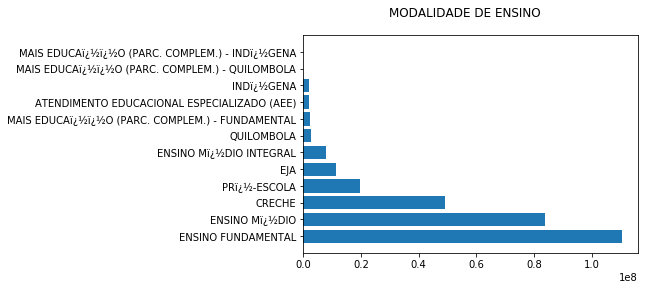

In [14]:
Barras_Horizontais(base=base_interim ,
                   var_ordem='VALOR_TOTAL_ESCOLAS_PNAE', 
                   valor_x='MODALIDADE_ENSINO', valor_y='VALOR_TOTAL_ESCOLAS_PNAE', 
                   titulo='MODALIDADE DE ENSINO',
                   ordem_cresc=False )

Analisando variável: ESFERA_GOVERNO

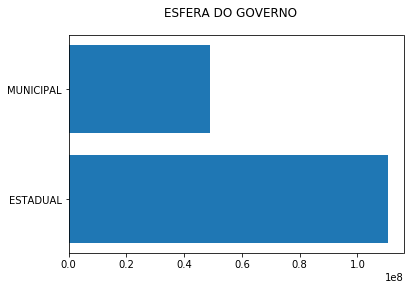

In [15]:
Barras_Horizontais(base=base_interim ,
                   var_ordem='VALOR_TOTAL_ESCOLAS_PNAE', 
                   valor_x='ESFERA_GOVERNO', valor_y='VALOR_TOTAL_ESCOLAS_PNAE', 
                   titulo='ESFERA DO GOVERNO',
                   ordem_cresc=False )


Analisando variável: ESTADO

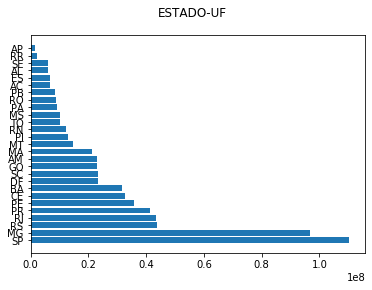

In [17]:
Barras_Horizontais(base=base_interim ,
                   var_ordem='VALOR_TOTAL_ESCOLAS_PNAE', 
                   valor_x='ESTADO', valor_y='VALOR_TOTAL_ESCOLAS_PNAE', 
                   titulo='ESTADO-UF',
                   ordem_cresc=False )

Pivot table para analisar as relações entre as variáveis

In [18]:
import numpy as np
pd.pivot_table(base_interim, 
               index=['MODALIDADE_ENSINO'],  columns=['ESFERA_GOVERNO'],
               values=['#ANO'], 
               aggfunc=[np.sum,np.mean,len], 
               margins=True, margins_name='Total')

sum              \
                                                      #ANO               
ESFERA_GOVERNO                                    ESTADUAL   MUNICIPAL   
MODALIDADE_ENSINO                                                        
ATENDIMENTO EDUCACIONAL ESPECIALIZADO (AEE)        54486.0   7365700.0   
CRECHE                                             28252.0  10519834.0   
EJA                                                54486.0   8019532.0   
ENSINO FUNDAMENTAL                                 54486.0  11092946.0   
ENSINO Mï¿½DIO                                     54486.0   1981676.0   
ENSINO Mï¿½DIO INTEGRAL                            54486.0     50450.0   
INDï¿½GENA                                         46414.0    435888.0   
MAIS EDUCAï¿½ï¿½O (PARC. COMPLEM.) - FUNDAMENTAL   42378.0   2782822.0   
MAIS EDUCAï¿½ï¿½O (PARC. COMPLEM.) - INDï¿½GENA    12108.0     20180.0   
MAIS EDUCAï¿½ï¿½O (PARC. COMPLEM.) - QUILOMBOLA     4036.0    199782.0   
PRï¿½-ESCOLA                                       34306.0  11105054.0   
QUILOMBOLA                                         36324.0   1228962.0   
Total                                             476248.0  54802826.0   

                                                                 mean  \
                                                                 #ANO   
ESFERA_GOVERNO                                         Total ESTADUAL   
MODALIDADE_ENSINO                                                       
ATENDIMENTO EDUCACIONAL ESPECIALIZADO (AEE)        7420186.0   2018.0   
CRECHE                                            10548086.0   2018.0   
EJA                                                8074018.0   2018.0   
ENSINO FUNDAMENTAL                                11147432.0   2018.0   
ENSINO Mï¿½DIO                                     2036162.0   2018.0   
ENSINO Mï¿½DIO INTEGRAL                             104936.0   2018.0   
INDï¿½GENA                                          482302.0   2018.0   
MAIS EDUCAï¿½ï¿½O (PARC. COMPLEM.) - FUNDAMENTAL   2825200.0   2018.0   
MAIS EDUCAï¿½ï¿½O (PARC. COMPLEM.) - INDï¿½GENA      32288.0   2018.0   
MAIS EDUCAï¿½ï¿½O (PARC. COMPLEM.) - QUILOMBOLA     203818.0   2018.0   
PRï¿½-ESCOLA                                      11139360.0   2018.0   
QUILOMBOLA                                         1265286.0   2018.0   
Total                                             55279074.0   2018.0   

                                                                        len  \
                                                                       #ANO   
ESFERA_GOVERNO                                   MUNICIPAL   Total ESTADUAL   
MODALIDADE_ENSINO                                                             
ATENDIMENTO EDUCACIONAL ESPECIALIZADO (AEE)         2018.0  2018.0     27.0   
CRECHE                                              2018.0  2018.0     14.0   
EJA                                                 2018.0  2018.0     27.0   
ENSINO FUNDAMENTAL                                  2018.0  2018.0     27.0   
ENSINO Mï¿½DIO                                      2018.0  2018.0     27.0   
ENSINO Mï¿½DIO INTEGRAL                             2018.0  2018.0     27.0   
INDï¿½GENA                                          2018.0  2018.0     23.0   
MAIS EDUCAï¿½ï¿½O (PARC. COMPLEM.) - FUNDAMENTAL    2018.0  2018.0     21.0   
MAIS EDUCAï¿½ï¿½O (PARC. COMPLEM.) - INDï¿½GENA     2018.0  2018.0      6.0   
MAIS EDUCAï¿½ï¿½O (PARC. COMPLEM.) - QUILOMBOLA     2018.0  2018.0      2.0   
PRï¿½-ESCOLA                                        2018.0  2018.0     17.0   
QUILOMBOLA                                          2018.0  2018.0     18.0   
Total                                               2018.0  2018.0    236.0   

                                                                     
                                                                     
ESFERA_GOVERNO                                   MUNICIPAL    Total  


Para as variáveis **quantitativas** analise as distribuições usando histogramas e boxplots. Verifique a possibilidade de existir outliers.

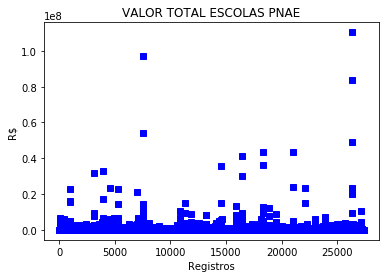

In [19]:
plt.plot(base_interim['VALOR_TOTAL_ESCOLAS_PNAE'], 'bs')
plt.title('VALOR TOTAL ESCOLAS PNAE')
plt.ylabel('R$')
plt.xlabel('Registros')

plt.show()

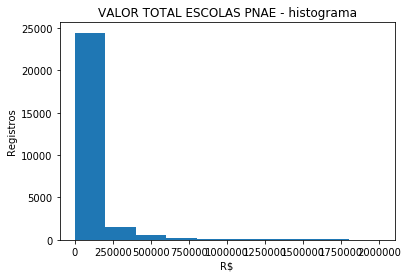

In [20]:
plt.hist(base_interim['VALOR_TOTAL_ESCOLAS_PNAE'],bins=[0,200000,400000,600000,800000,1000000,1200000,1400000,1600000,1800000,2000000])
plt.title('VALOR TOTAL ESCOLAS PNAE - histograma')
plt.xlabel('R$')
plt.ylabel('Registros')
plt.show()

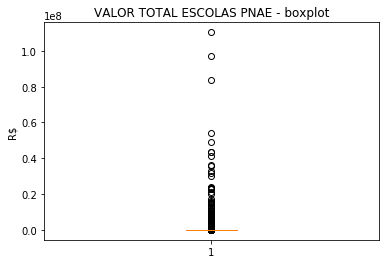

In [21]:
plt.boxplot(base_interim['VALOR_TOTAL_ESCOLAS_PNAE'])
plt.title('VALOR TOTAL ESCOLAS PNAE - boxplot')
plt.ylabel('R$')
plt.show()

Os campos quantitativos podem ter valores atípicos que são dificeis de identicar ou necessitam de um critério isento e objetivo. <br>
Um criério que pode ser aplicado é analisar os valores a partir de seus limites inferiores e superiores identificando os casos que estão fora dos limites conforme regra abaixo.

\begin{align}
L_{sup} = \bar{x} + 1.5 * (Q3-Q1) 
\end{align}\begin{align}
L_{inf} = \bar{x} - 1.5 * (Q3-Q1) 
\end{align}

Para analisar desta forma precisamos primeiro identificar os limites:

In [22]:
# Intervalo interquartil e limites
from scipy.stats import iqr
valor_iqr=iqr(base_interim['VALOR_TOTAL_ESCOLAS_PNAE'],  keepdims=True)[0]

l_sup = base_interim['VALOR_TOTAL_ESCOLAS_PNAE'].mean()  + 1.5*valor_iqr
l_inf = base_interim['VALOR_TOTAL_ESCOLAS_PNAE'].mean()  - 1.5*valor_iqr

print('Intervalo interquartil:', valor_iqr)
print('Média', base_interim['VALOR_TOTAL_ESCOLAS_PNAE'].mean())
print('Limite Superior:', l_sup)
print('Limite inferior:', l_inf)


Intervalo interquartil: 65934.0
Média 146708.02733435543
Limite Superior: 245609.02733435543
Limite inferior: 47807.02733435543


Na sequência verificar quais registros podem ser considerados atípicos (`CASO_ATIPICO=1`), ou seja, todo aquele que estiver fora do intervalo.

In [23]:
base_interim['CASO_ATIPICO']=base_interim['VALOR_TOTAL_ESCOLAS_PNAE'].apply(lambda x: 1 if (x<l_inf or x>l_sup) else 0)

Valide se os casos foram classificados corretamente antes de seguir.

In [24]:
base_interim[['VALOR_TOTAL_ESCOLAS_PNAE','CASO_ATIPICO']].head() # use mais registros

,VALOR_TOTAL_ESCOLAS_PNAE,CASO_ATIPICO
0,4346.0,1
1,63986.0,0
2,9024.0,1
3,119752.0,0
4,47110.0,1


In [25]:
pd.pivot_table(base_interim, 
               index=['CASO_ATIPICO'],  
               values=['VALOR_TOTAL_ESCOLAS_PNAE'], 
               aggfunc=[np.min,np.max,len], 
               margins=True, margins_name='Total')

,amin,amax,len
,VALOR_TOTAL_ESCOLAS_PNAE,VALOR_TOTAL_ESCOLAS_PNAE,VALOR_TOTAL_ESCOLAS_PNAE
CASO_ATIPICO,,,
0,47808.0,245410.0,6994.0
1,10.6,110408168.0,20399.0
Total,10.6,110408168.0,27393.0


Vejam que quase **74%** desta base tem casos atípicos.

Após o termino de sua análise exploratória dos dados compile todas as suas observações.<BR>
Discuta e avalie suas conclusões antes de seguir para a última etapa.  

## Passo 4 - Feature Engineering

Esta parte é a mais complexa e decisiva, pois impacta a criação do modelo que sera usado no experimento.
Aqui é mais arte que ciência, ou seja, depende muito da experiência, do tipo de dados e da pergunta de negócio que se quer responder.

Para nosso experimento vamos desprezar (remover) as seguintes colunas: **#ANO**, **ESFERA_GOVERNO** e **CASO_ATIPICO**, pois não são relevantes para nosso trabalho. 

Além disso, vamos transformar a variável **MODALIDADE_ENSINO** de forma que cada opcão seja uma nova coluna no arquivo de dados. 

Vamos criar um campo chamado **CIDADE** que combine Estado e Município, pois pode have dois ou mais nomes iguais em estados diferentes

Apenas estas três modicações serão consideradas. 

Criando a variável CIDADE e removendo as colunas #ANO e ESFERA_GOVERNO.

In [402]:
base_interim['CIDADE'] = base_interim['ESTADO'] + '-' + base_interim['MUNICIPIO']
#base_resumida = base_interim.drop(['#ANO', 'ESFERA_GOVERNO', 'MUNICIPIO', 'CASO_ATIPICO', 'ESTADO'], axis=1)

Inspecionando os dados

In [403]:
base_interim[['CIDADE','MODALIDADE_ENSINO', 'VALOR_TOTAL_ESCOLAS_PNAE']].head()

,CIDADE,MODALIDADE_ENSINO,VALOR_TOTAL_ESCOLAS_PNAE
0,AC-ACRELANDIA,ATENDIMENTO EDUCACIONAL ESPECIALIZADO (AEE),4346.0
1,AC-ACRELANDIA,CRECHE,63986.0
2,AC-ACRELANDIA,EJA,9024.0
3,AC-ACRELANDIA,ENSINO FUNDAMENTAL,119752.0
4,AC-ACRELANDIA,PRï¿½-ESCOLA,47110.0


Agora vamos transformar a variável **MODALIDADE_ENSINO** de forma que cada opcão seja uma nova coluna no arquivo de dados.

In [405]:
base_final = pd.pivot_table(base_interim[['CIDADE','MODALIDADE_ENSINO', 'VALOR_TOTAL_ESCOLAS_PNAE']], 
                            index=['CIDADE'], 
                            columns=['MODALIDADE_ENSINO'], 
                            values=['VALOR_TOTAL_ESCOLAS_PNAE'])

In [406]:
base_final.reset_index(inplace=True)
base_final = base_final.droplevel(0, axis=1)

In [407]:
base_final = base_final.rename(columns={base_final.columns[0]:'CIDADE'})

Substituindo os valores NaN pelo valor 0.

In [408]:
base_final.fillna(0, inplace=True)

Inspecionando os dados final e salvando um novo arquivo CSV.

In [409]:
base_final.shape

(5513, 13)

In [410]:
base_final

MODALIDADE_ENSINO,CIDADE,ATENDIMENTO EDUCACIONAL ESPECIALIZADO (AEE),CRECHE,EJA,ENSINO FUNDAMENTAL,ENSINO Mï¿½DIO,ENSINO Mï¿½DIO INTEGRAL,INDï¿½GENA,MAIS EDUCAï¿½ï¿½O (PARC. COMPLEM.) - FUNDAMENTAL,MAIS EDUCAï¿½ï¿½O (PARC. COMPLEM.) - INDï¿½GENA,MAIS EDUCAï¿½ï¿½O (PARC. COMPLEM.) - QUILOMBOLA,PRï¿½-ESCOLA,QUILOMBOLA
0,AC-ACRELANDIA,4346.0,63986.0,9024.0,119752.0,0.0,0.0,0.0,0.0,0.0,0.0,47110.0,0.0
1,AC-ASSIS BRASIL,2459.2,8046.4,6195.2,62726.4,0.0,0.0,0.0,0.0,0.0,0.0,27984.0,0.0
2,AC-BRASILEIA,7738.0,75756.0,6720.0,156240.0,0.0,0.0,0.0,0.0,0.0,0.0,91266.0,0.0
3,AC-BUJARI,1696.0,46010.0,0.0,85968.0,0.0,0.0,0.0,0.0,0.0,0.0,27560.0,0.0
4,AC-CAPIXABA,3243.6,12519.0,22982.4,111607.2,0.0,0.0,0.0,0.0,0.0,0.0,35584.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5508,TO-TOCANTINOPOLIS,4452.0,94588.0,0.0,115882.0,0.0,0.0,0.0,0.0,0.0,0.0,45580.0,0.0
5509,TO-TUPIRAMA,0.0,6355.8,0.0,35245.8,0.0,0.0,0.0,0.0,0.0,0.0,4770.0,0.0
5510,TO-TUPIRATINS,318.0,7490.0,0.0,17872.0,0.0,0.0,0.0,0.0,0.0,0.0,6678.0,0.0
5511,TO-WANDERLANDIA,2968.0,25894.0,3350.0,131382.0,0.0,0.0,0.0,11360.0,0.0,0.0,24592.0,0.0


In [411]:
base_final.to_csv('datasets/PNAE_RECURSOS_REPASSADOS_2018_FINAL.csv', index=False)

FIM

## Referências bibliográficas
**Falta ajustar para ABNT**<BR>
Disponível em: ftp://ftp2.fnde.gov.br/dadosabertos/PNAE/PNAE_RECURSOS_REPASSADOS_2018.csv <BR>
https://pt.wikipedia.org/wiki/Interpola%C3%A7%C3%A3o_polinomial#:~:text=Denomina%2Dse%20interpola%C3%A7%C3%A3o%20polinomial%20o,fun%C3%A7%C3%A3o%20interpoladora%20%C3%A9%20a%20fun%C3%A7%C3%A3o&text=Na%20fase%20de%20escolha%20do,interpola%C3%A7%C3%A3o%2C%20frequentemente%20s%C3%A3o%20escolhidos%20polin%C3%B3mios. <BR>
Pandas documentation. **https://pandas.pydata.org**. Disponível em: https://pandas.pydata.org/pandas-docs/stable/index.html. Acesso em 11 de maio de 2020.<BR>
McKinney, Wes. **Python for Data Analysis**. Sebastopol: O’Reilly Media, Inc., 2012